# Trabalho Final - Web Mining & Crawler Scraping

- Professor: Fernando Sequeira Sousa
- Alunos:
    - Valdir Fortunato Bueno
    - Lucas Gabriel de Lima Souza
    - Edson Fernandes da Silva 

# Entendimento do Negócio

A base utilizada possui 515 mil reviews de hotéis na Europa, extraídas do booking.com e disponibilizadas no Kaggle.

A aplicação tem o objetivo de classificar os hotéis a partir das reviews dos clientes.

Para isso, é implementada uma análise de sentimento com o intuito de identificar a polaridade dos comentários positivos e negativos, bem como as palavras mais encontradas em ambos os comentários.

Isso traz insights para os tomadores de decisão identificarem quais são os pontos que podem ser melhorados, ou que estão trazendo repercursão positiva.

#  Importando as bibliotecas necessárias para o projeto:

In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\valdi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\valdi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valdi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Carregando o conjunto de dados:

In [2]:
df = pd.read_csv(r'C:\Users\valdi\Documents\DataMining\Trabalho_Final\archive\Hotel_Reviews.csv', delimiter=';')
df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08/03/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,523.605.759,49.159.683
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,08/03/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,523.605.759,49.159.683
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,523.605.759,49.159.683
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,523.605.759,49.159.683
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,523.605.759,49.159.683


# Entendimento dos dados¶

Estamos utilizando a base de reviews de hotéis disponibilizada no kaglle:
https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

O arquivo csv contém 17 campos. A descrição de cada campo segue abaixo:

- Hotel_Address: Endereço do hotel.
- Review_Date: Data em que o revisor postou a revisão correspondente.
- Average_Score: Score médio do hotel, calculado com base no último comentário do último ano.
- Hotel_Name: Nome do Hotel
- Reviewer Nationality: Nacionalidade do Revisor
- Negative_Review: Avaliação negativa que o revisor deu ao hotel. Se o revisor não der a crítica negativa, então deve ser: 'Sem negativa'
- Review_Total_Negative_Word_Counts: Número total de palavras na crítica negativa.
- Positive_Review: avaliação positiva que o revisor deu ao hotel. Se o revisor não der a crítica negativa, então deve ser: 'Não Positivo'
- Review_Total_Positive_Word_Counts: Número total de palavras na crítica positiva.
- Reviewer_Score: Pontuação que o avaliador deu ao hotel, com base em sua experiência
- Total_Number_of_Reviews_Reviewer_Has_Given: Número de avaliações que os revisores deram no passado.
- Total_Number_of_Reviews: Número total de avaliações válidas que o hotel possui.
- Tags: Tags que o revisor deu ao hotel.
- days_since_review: Duração entre a data de revisão e a data de raspagem.
- Adicional_Number_of_Scoring: Há também alguns convidados que apenas fizeram uma pontuação no serviço em vez de uma avaliação. Este número indica quantas pontuações válidas sem revisão existem.
- lat: Latitude do hotel
- lng: longitude do hotel


In [3]:
#Informações sobre o formato, tamanho e tipagem dos dados¶
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

# Preparação dos Dados:


### Criando funções para tratar os dados:

In [4]:
def remove_stopwords(text):
    """Remove as stop words do texto"""
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.casefold() not in stop_words]
    return ' '.join(words)


def clean_text(text):
    """Remove pontuações e caracteres especiais do texto"""
    text = text.str.replace('[^\w\s]', '', regex=True)
    text = text.str.replace('\d+', '', regex=True)
    text = text.str.replace('\n', '')
    text = text.str.replace('\r', '')
    text = text.str.replace('\r\n', '')
    text = text.str.lower()
    text = text.apply(remove_stopwords)
    return text


# Aplicando as funções aos comentários positivos e negativos:

In [5]:
# Selecionando uma amostragem
df= df.sample(frac = 0.3, replace = False, random_state=40)

# Aplicar a função "clean_text" aos comentários positivos e negativos
df['Positive_Review'] = clean_text(df['Positive_Review'])
df['Negative_Review'] = clean_text(df['Negative_Review'])

# Adicionar coluna com a polaridade do comentário positivo e negativo
sia = SentimentIntensityAnalyzer()

df['Positive_Sentiment'] = df['Positive_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Negative_Sentiment'] = df['Negative_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])


# Modelagem:

In [6]:
# Média da polaridade dos comentários positivos e negativos
print('Média da polaridade dos comentários positivos:', df['Positive_Sentiment'].mean())
print('Média da polaridade dos comentários negativos:', df['Negative_Sentiment'].mean())

# Contagem das palavras mais comuns em comentários positivos e negativos
from collections import Counter

positive_words = Counter(" ".join(df[df['Positive_Sentiment'] > 0.5]['Positive_Review']).split()).most_common(20)
print('Palavras mais comuns em comentários positivos:')
print(positive_words)

negative_words = Counter(" ".join(df[df['Negative_Sentiment'] < -0.5]['Negative_Review']).split()).most_common(20)
print('Palavras mais comuns em comentários negativos:')
print(negative_words)


Média da polaridade dos comentários positivos: 0.6094837552756251
Média da polaridade dos comentários negativos: -0.10860073939542787
Palavras mais comuns em comentários positivos:
[('staff', 50354), ('location', 42567), ('room', 35740), ('hotel', 33061), ('great', 31494), ('good', 28427), ('friendly', 23719), ('breakfast', 21641), ('helpful', 21181), ('nice', 18447), ('excellent', 18406), ('clean', 18226), ('comfortable', 17939), ('bed', 12631), ('positive', 10813), ('lovely', 10551), ('rooms', 10305), ('stay', 9123), ('perfect', 7676), ('really', 7674)]
Palavras mais comuns em comentários negativos:
[('negative', 38367), ('room', 7347), ('hotel', 3859), ('staff', 2306), ('breakfast', 2068), ('bad', 1991), ('poor', 1880), ('one', 1442), ('bed', 1355), ('rooms', 1335), ('small', 1272), ('night', 1267), ('us', 1252), ('bathroom', 1191), ('service', 1183), ('shower', 1091), ('would', 1035), ('could', 984), ('reception', 966), ('also', 914)]


# Avaliação:

Nesta análise de sentimentos, pudemos explorar os comentários dos hóspedes em relação aos hotéis. Identificamos que os comentários positivos têm uma polaridade maior do que os comentários negativos e identificamos as palavras mais comuns em ambos os tipos de comentários. As informações obtidas podem ser úteis para hotéis melhorarem aspectos específicos e atrair mais hóspedes satisfeitos.

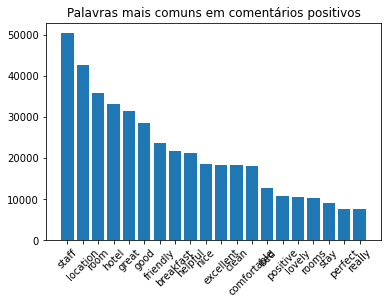

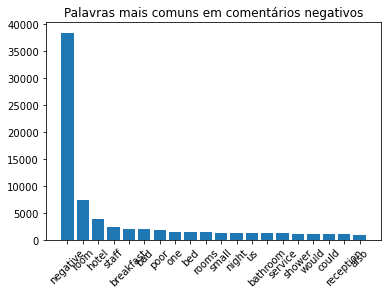

In [7]:
import matplotlib.pyplot as plt

# Gráfico de barras das palavras mais comuns em comentários positivos
words = [word[0] for word in positive_words]
counts = [count[1] for count in positive_words]

plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Palavras mais comuns em comentários positivos')
plt.show()

# Gráfico de barras das palavras mais comuns em comentários negativos
words = [word[0] for word in negative_words]
counts = [count[1] for count in negative_words]

plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Palavras mais comuns em comentários negativos')
plt.show()


In [8]:
# Caso não tenha instalado, é necessário instalar o wordcloud e o pillow
#pip install wordcloud
#pip install --force pillow

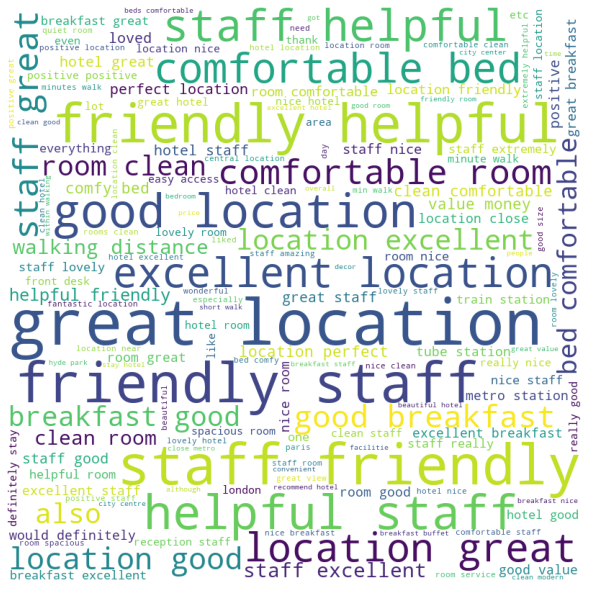

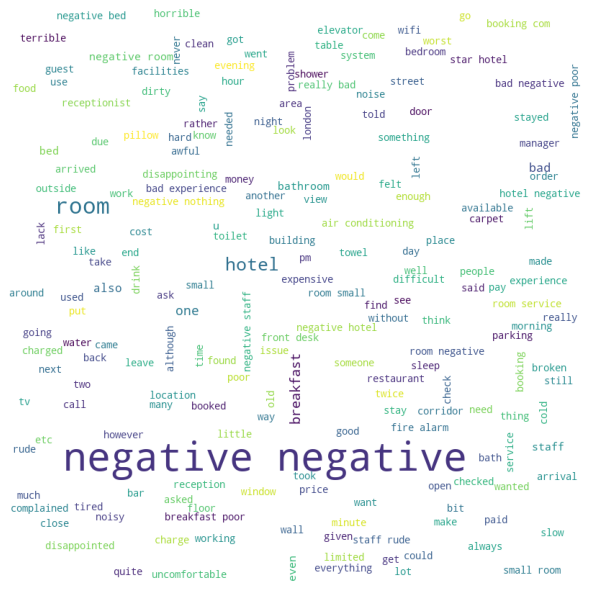

In [9]:
from wordcloud import WordCloud

# Nuvem de palavras dos comentários positivos
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(" ".join(df[df['Positive_Sentiment'] > 0.5]['Positive_Review']))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Nuvem de palavras dos comentários negativos
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords.words('english'), min_font_size = 10).generate(" ".join(df[df['Negative_Sentiment'] < -0.5]['Negative_Review']))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
